In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_02_21 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [3]:
from plotutils import *

In [4]:
base='sims/2023-03-31'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)
    
old_base='sims/2023-03-01'
    

In [5]:
rf_size=19
eta=2e-6
blur_left=6
blur_right=-1

number_of_neurons=3
number_of_processes=4
mu_c=7.5
sigma_c=2
mu_r=0
sigma_r=0
noise=1

sfname=f'{old_base}/deficit {number_of_neurons} neurons {blur_left} blur {mu_c} mu_c {sigma_c} sigma_c.asdf'



seq=pn.Sequence()

total_time=3*day
save_interval=1*hour

base_image_file='asdf/bbsk081604_all.asdf'
    
images=[]
dt=200*ms

for bv in [blur_left,blur_right]:
    if bv<=0:
        im=pi5.filtered_images(
                            base_image_file,
                            {'type':'dog','sd1':1,'sd2':3},
                            {'type':'norm'},
                            )
    else:
        im=pi5.filtered_images(
                                base_image_file,
                                {'type':'blur','size':bv},
                                {'type':'dog','sd1':1,'sd2':3},
                                {'type':'norm'},
                                )
    images.append(im)
    
    
dt=200*ms        
pre1=pn.neurons.natural_images_with_jitter(images[0],
                                            rf_size=rf_size,
                                            time_between_patterns=dt,
                                            sigma_r=1,
                                            sigma_c=1,
                                            verbose=False)

pre2=pn.neurons.natural_images_with_jitter(images[1],
                                            rf_size=rf_size,
                                            other_channel=pre1,
                                            time_between_patterns=dt,
                                            mu_r=mu_r,mu_c=mu_c,
                                            sigma_r=sigma_r,sigma_c=sigma_c,
                                            verbose=False)



sigma=noise
pre1+=pn.neurons.process.add_noise_normal(0,sigma)

sigma=noise
pre2+=pn.neurons.process.add_noise_normal(0,sigma)

pre=pre1+pre2

post=default_post(number_of_neurons)
c=default_bcm(pre,post)
c.eta=eta

sim=pn.simulation(total_time)
sim.dt=dt

sim.monitor(post,['output'],save_interval)
sim.monitor(c,['weights','theta'],save_interval)
sim+=pn.grating_response(print_time=False)


seq+=sim,[pre,post],[c]


#==========================================================================================

blur_left=-1
blur_right=-1

images=[]
dt=200*ms

for bv in [blur_left,blur_right]:
    if bv<=0:
        im=pi5.filtered_images(
                            base_image_file,
                            {'type':'dog','sd1':1,'sd2':3},
                            {'type':'norm'},
                            )
    else:
        im=pi5.filtered_images(
                                base_image_file,
                                {'type':'blur','size':bv},
                                {'type':'dog','sd1':1,'sd2':3},
                                {'type':'norm'},
                                )
    images.append(im)
    
    
dt=200*ms        
pre1=pn.neurons.natural_images_with_jitter(images[0],
                                            rf_size=rf_size,
                                            time_between_patterns=dt,
                                            sigma_r=1,
                                            sigma_c=1,
                                            verbose=False)

pre2=pn.neurons.natural_images_with_jitter(images[1],
                                            rf_size=rf_size,
                                            other_channel=pre1,
                                            time_between_patterns=dt,
                                            mu_r=mu_r,mu_c=mu_c,
                                            sigma_r=sigma_r,sigma_c=sigma_c,
                                            verbose=False)



sigma=noise
pre1+=pn.neurons.process.add_noise_normal(0,sigma)

sigma=noise
pre2+=pn.neurons.process.add_noise_normal(0,sigma)

pre=pre1+pre2

post=default_post(number_of_neurons)
c=default_bcm(pre,post)
c.eta=eta

sim=pn.simulation(total_time)
sim.dt=dt

sim.monitor(post,['output'],save_interval)
sim.monitor(c,['weights','theta'],save_interval)
sim+=pn.grating_response(print_time=False)


seq+=sim,[pre,post],[c]



Using cache_images/cache_images_33487c39ae14fd4b2e1147c1b93a3055.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.

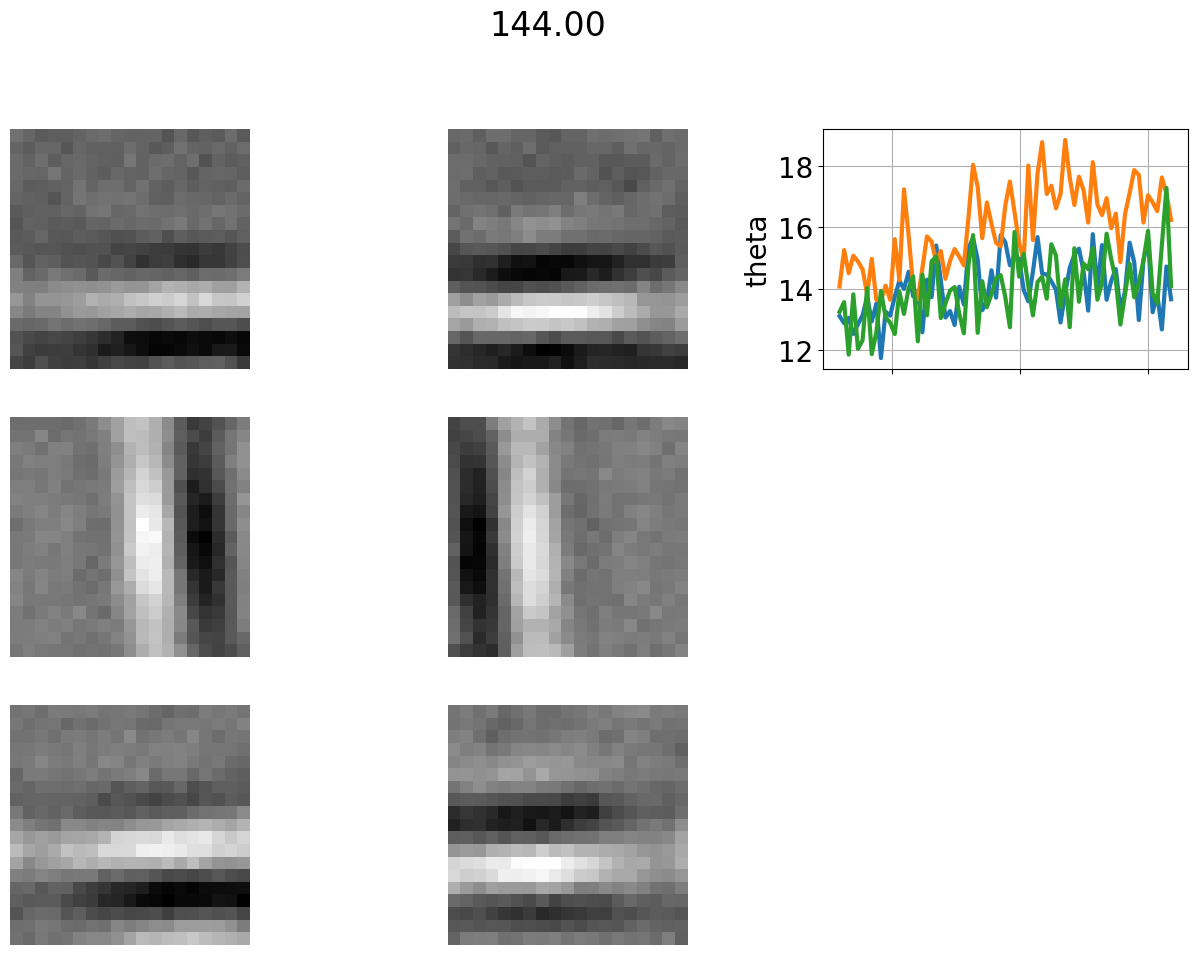

.] Sequence Time Elapsed...2 m, 1.96 s


In [6]:
seq.run(display=mydisplay,display_hash=False,
               time_between_display=save_interval)
sfname=f"{base}/blah.asdf"
pn.save(sfname,seq) 

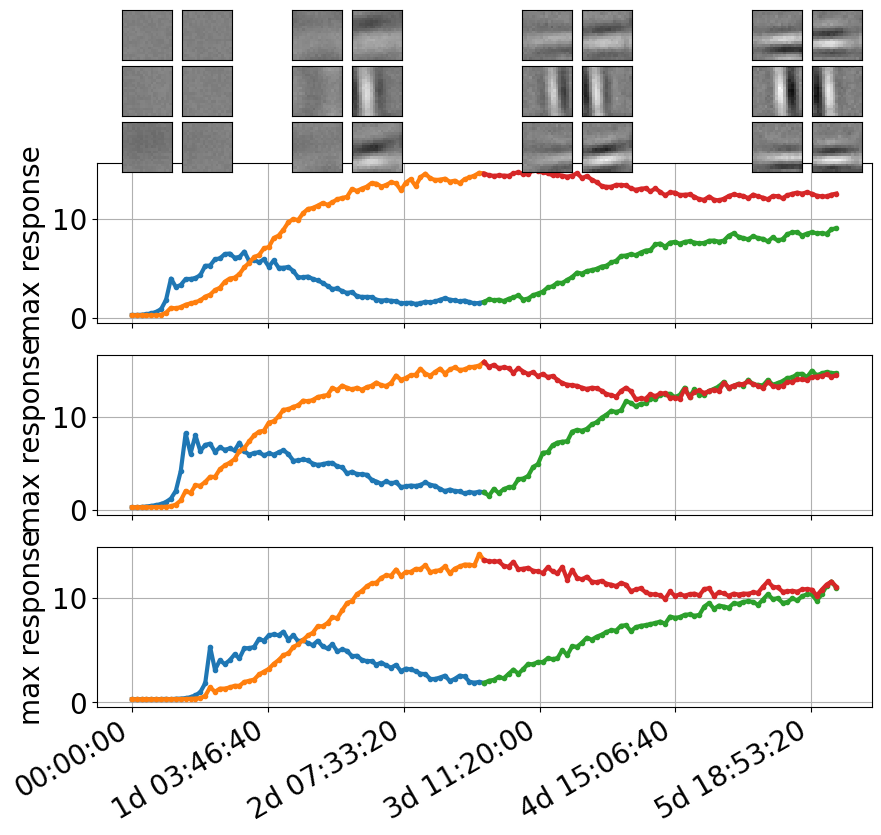

In [7]:
plot_max_response(sfname)
plot_mini_rfs(sfname,
              total_time/10,.15,.85,
              2*total_time/3,.32,.85,
              2*2*total_time/3,.55,.85,
              2*3*total_time/3,.78,.85,
             )

## reverse the direction of the blur

In [6]:
def addseq(seq):

    base_image_file='asdf/bbsk081604_all.asdf'

    images=[]
    dt=200*ms

    for bv in [blur_left,blur_right]:
        if bv<=0:
            im=pi5.filtered_images(
                                base_image_file,
                                {'type':'dog','sd1':1,'sd2':3},
                                {'type':'norm'},
                                )
        else:
            im=pi5.filtered_images(
                                    base_image_file,
                                    {'type':'blur','size':bv},
                                    {'type':'dog','sd1':1,'sd2':3},
                                    {'type':'norm'},
                                    )
        images.append(im)


    dt=200*ms        
    pre1=pn.neurons.natural_images_with_jitter(images[0],
                                                rf_size=rf_size,
                                                time_between_patterns=dt,
                                                sigma_r=1,
                                                sigma_c=1,
                                                verbose=False)

    pre2=pn.neurons.natural_images_with_jitter(images[1],
                                                rf_size=rf_size,
                                                other_channel=pre1,
                                                time_between_patterns=dt,
                                                mu_r=mu_r,mu_c=mu_c,
                                                sigma_r=sigma_r,sigma_c=sigma_c,
                                                verbose=False)



    sigma=noise
    pre1+=pn.neurons.process.add_noise_normal(0,sigma)

    sigma=noise
    pre2+=pn.neurons.process.add_noise_normal(0,sigma)

    pre=pre1+pre2

    post=default_post(number_of_neurons)
    c=default_bcm(pre,post)
    c.eta=eta

    sim=pn.simulation(total_time)
    sim.dt=dt

    sim.monitor(post,['output'],save_interval)
    sim.monitor(c,['weights','theta'],save_interval)
    sim+=pn.grating_response(print_time=False)


    seq+=sim,[pre,post],[c]
    

In [17]:
rf_size=19
eta=2e-6
blur_left=6
blur_right=-1

number_of_neurons=5
number_of_processes=4
mu_c=7.5
sigma_c=2
mu_r=0
sigma_r=0
noise=1

sfname=f'{old_base}/deficit {number_of_neurons} neurons {blur_left} blur {mu_c} mu_c {sigma_c} sigma_c.asdf'



seq=pn.Sequence()

total_time=3*day
save_interval=1*hour


addseq(seq)


blur_left=-1
blur_right=6

addseq(seq)



Using cache_images/cache_images_33487c39ae14fd4b2e1147c1b93a3055.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_33487c39ae14fd4b2e1147c1b93a3055.asdf from cache.

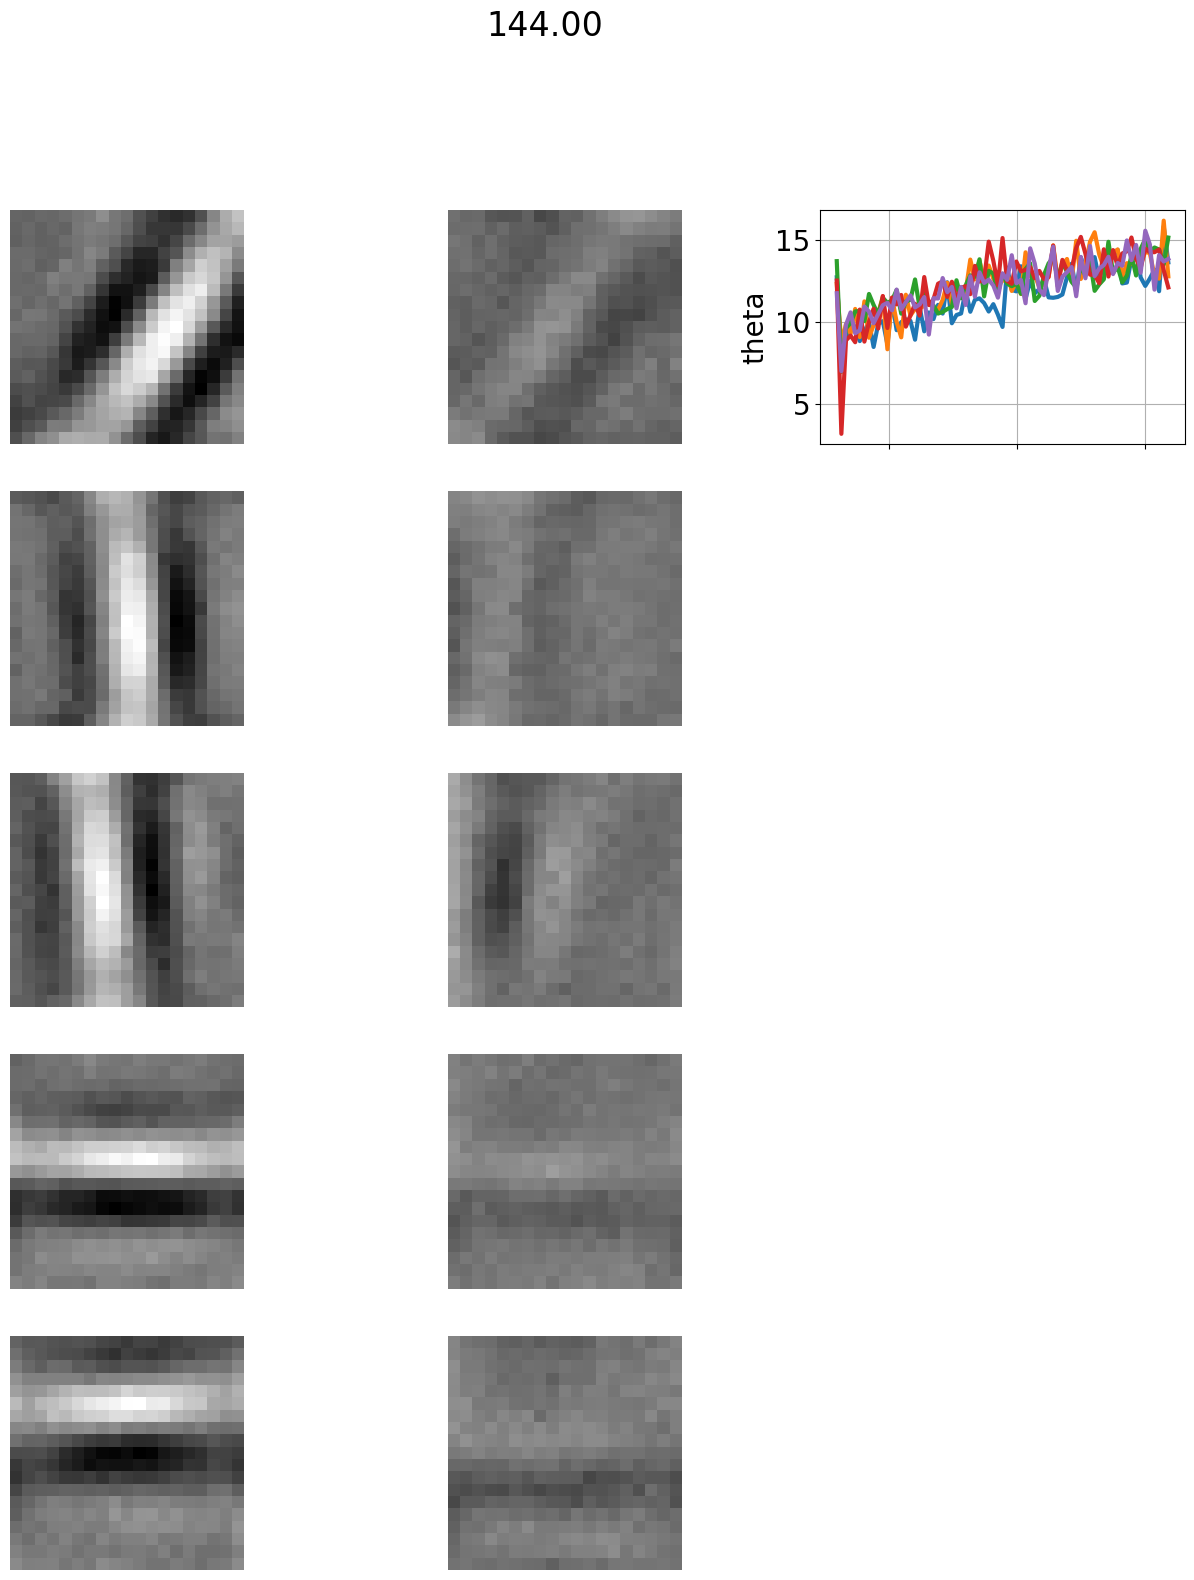

.] Sequence Time Elapsed...2 m, 24.59 s


In [18]:
seq.run(display=mydisplay,display_hash=False,
               time_between_display=save_interval)
sfname=f"{base}/blah.asdf"
pn.save(sfname,seq) 

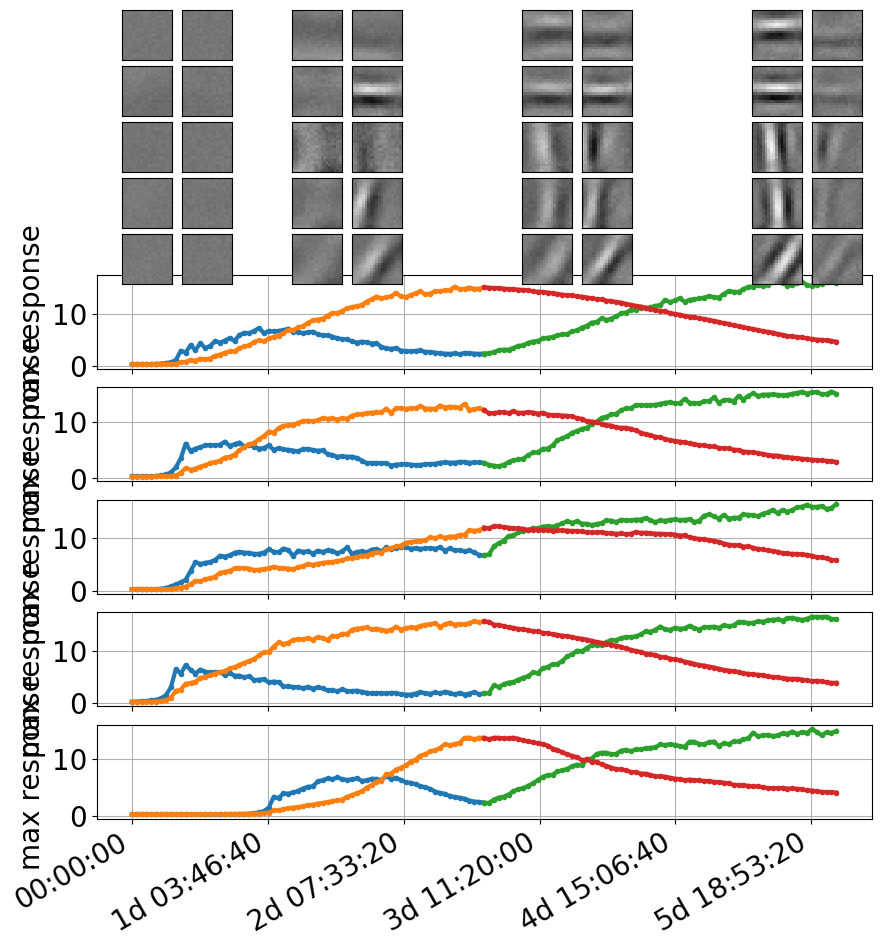

In [19]:
plot_max_response(sfname)
plot_mini_rfs(sfname,
              total_time/10,.15,.85,
              2*total_time/3,.32,.85,
              2*2*total_time/3,.55,.85,
              2*3*total_time/3,.78,.85,
             )

## Compare some different amounts of blur

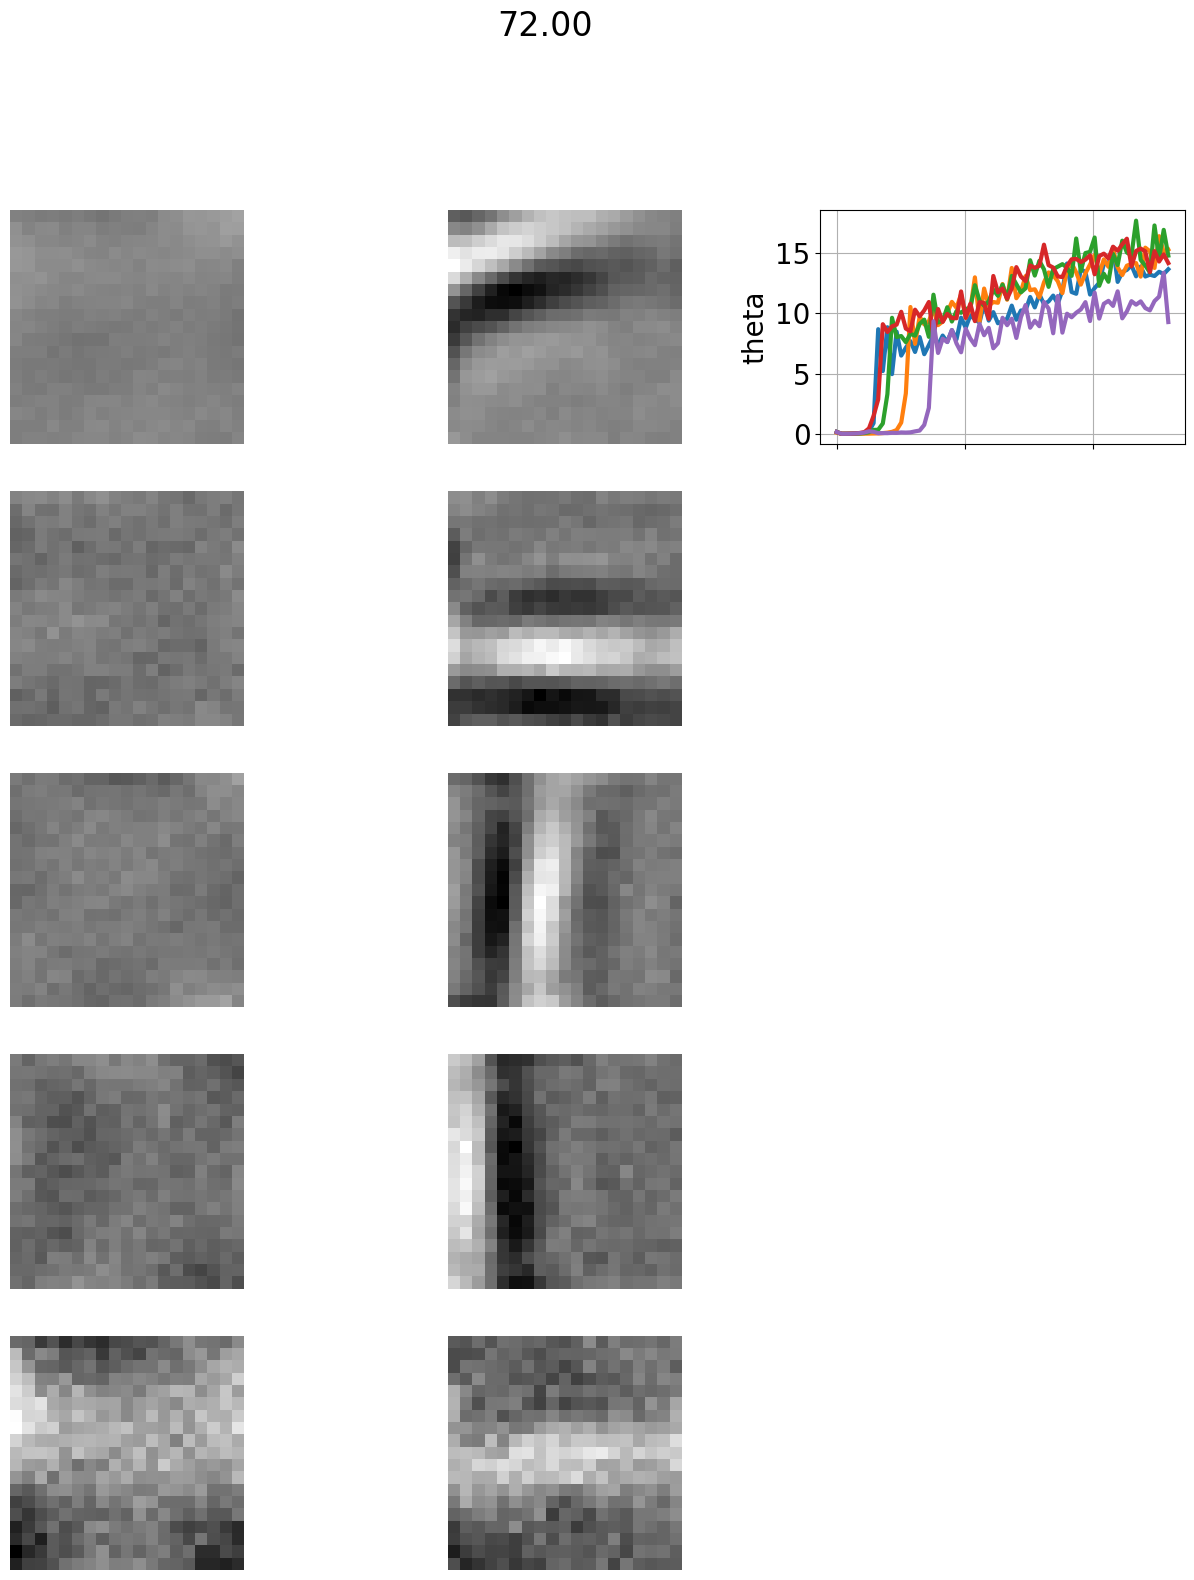

.] Sequence Time Elapsed...1 m, 12.06 s


In [16]:
rf_size=19
eta=2e-6
blur_left=6
blur_right=-1

number_of_neurons=5
number_of_processes=4
mu_c=7.5
sigma_c=2
mu_r=0
sigma_r=0
noise=0.1

seq=pn.Sequence()

total_time=3*day
save_interval=1*hour


addseq(seq)


# blur_left=-1
# blur_right=6

# addseq(seq)
seq.run(display=mydisplay,display_hash=False,
               time_between_display=save_interval)
sfname=f"{base}/blah_deficit.asdf"
pn.save(sfname,seq) 

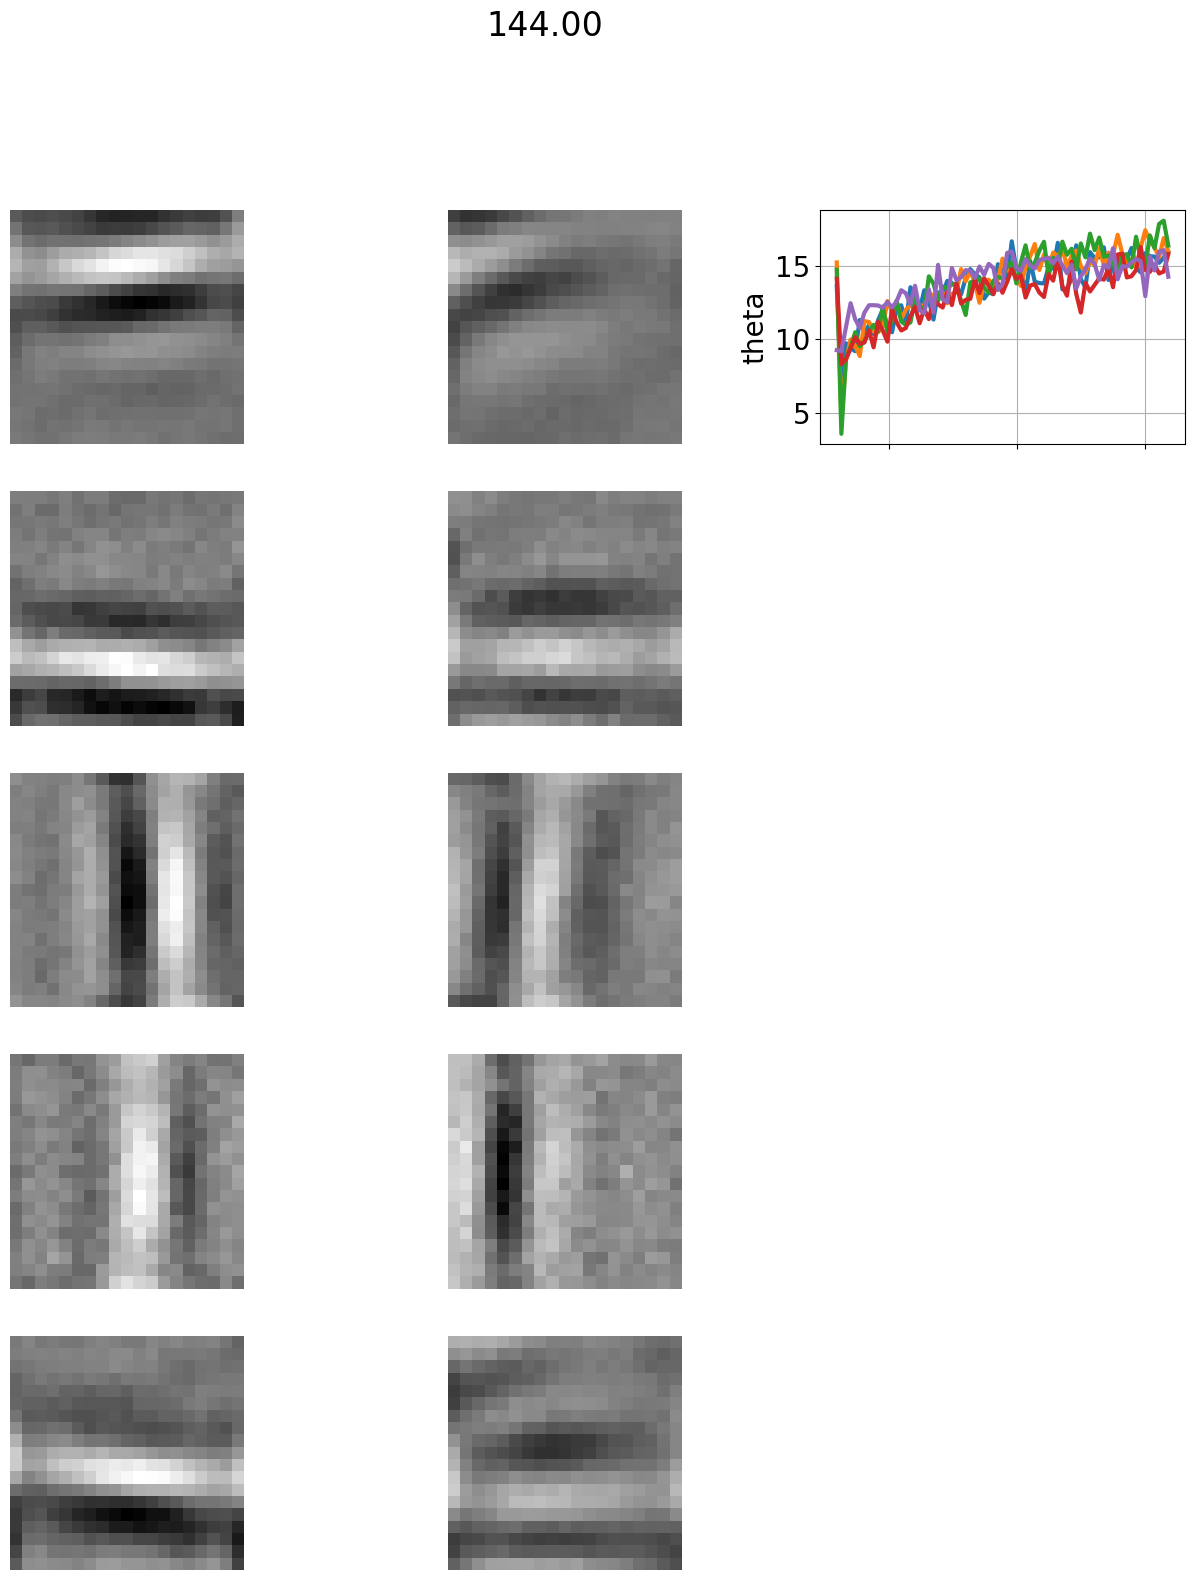

.] Sequence Time Elapsed...1 m, 10.82 s


In [17]:
seq2=pn.Sequence()

total_time=3*day
save_interval=1*hour

seq2.load_seq(seq)

blur_left=-1
blur_right=6

addseq(seq2)
seq2.run(display=mydisplay,display_hash=False,
               time_between_display=save_interval)
sfname=f"{base}/blah.asdf"
pn.save(sfname,seq2) 

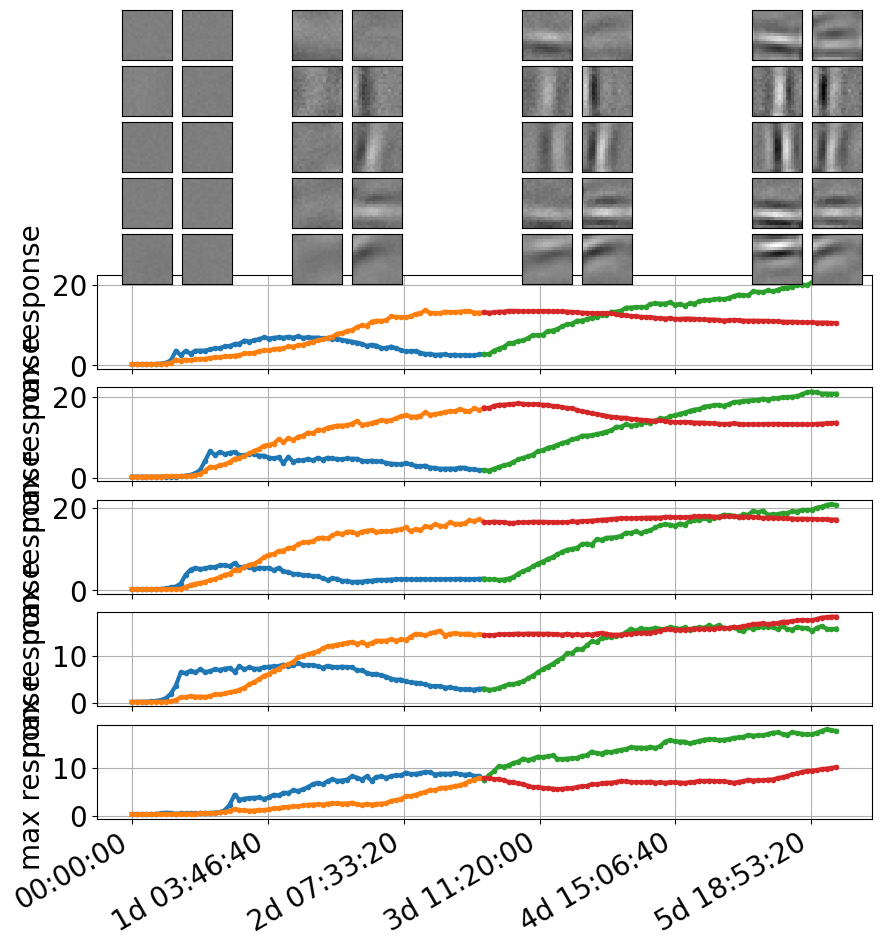

In [18]:
plot_max_response(sfname)
plot_mini_rfs(sfname,
              total_time/10,.15,.85,
              2*total_time/3,.32,.85,
              2*2*total_time/3,.55,.85,
              2*3*total_time/3,.78,.85,
             )

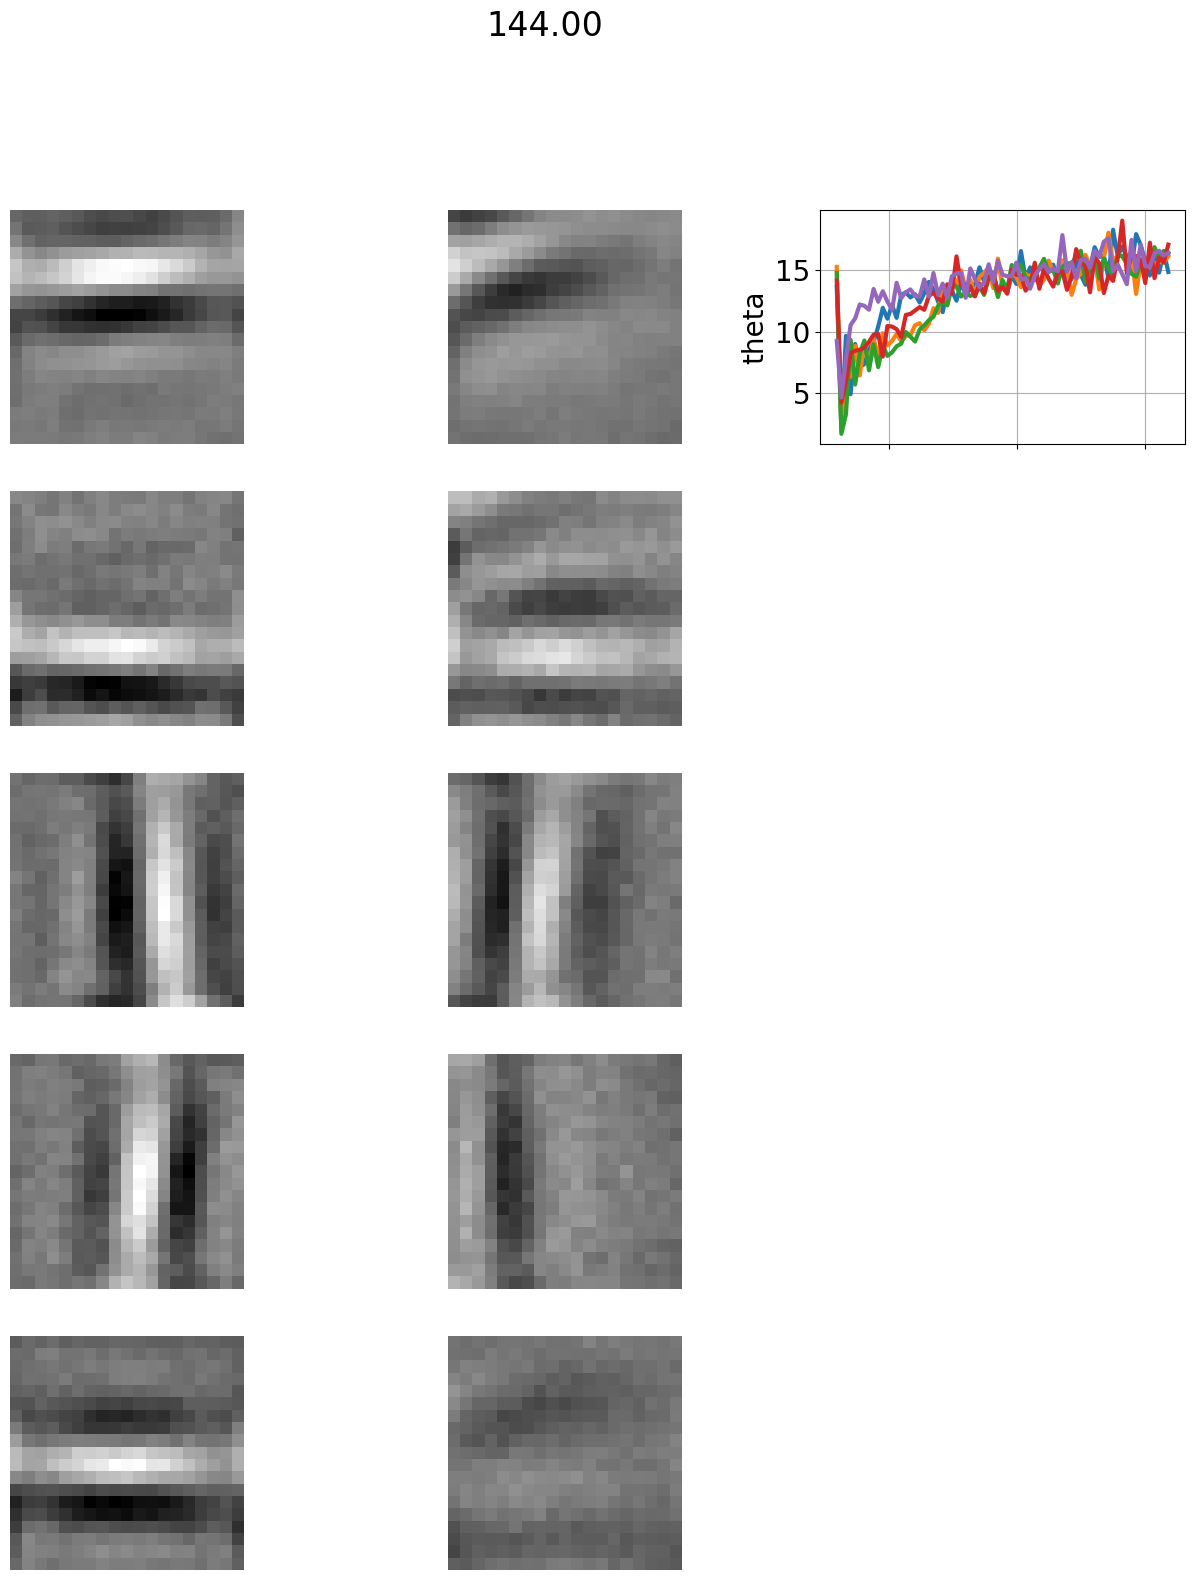

.] Sequence Time Elapsed...1 m, 9.15 s


In [19]:
seq2=pn.Sequence()

total_time=3*day
save_interval=1*hour

seq2.load_seq(seq)

blur_left=-1
blur_right=10

addseq(seq2)
seq2.run(display=mydisplay,display_hash=False,
               time_between_display=save_interval)
sfname=f"{base}/blah.asdf"
pn.save(sfname,seq2) 

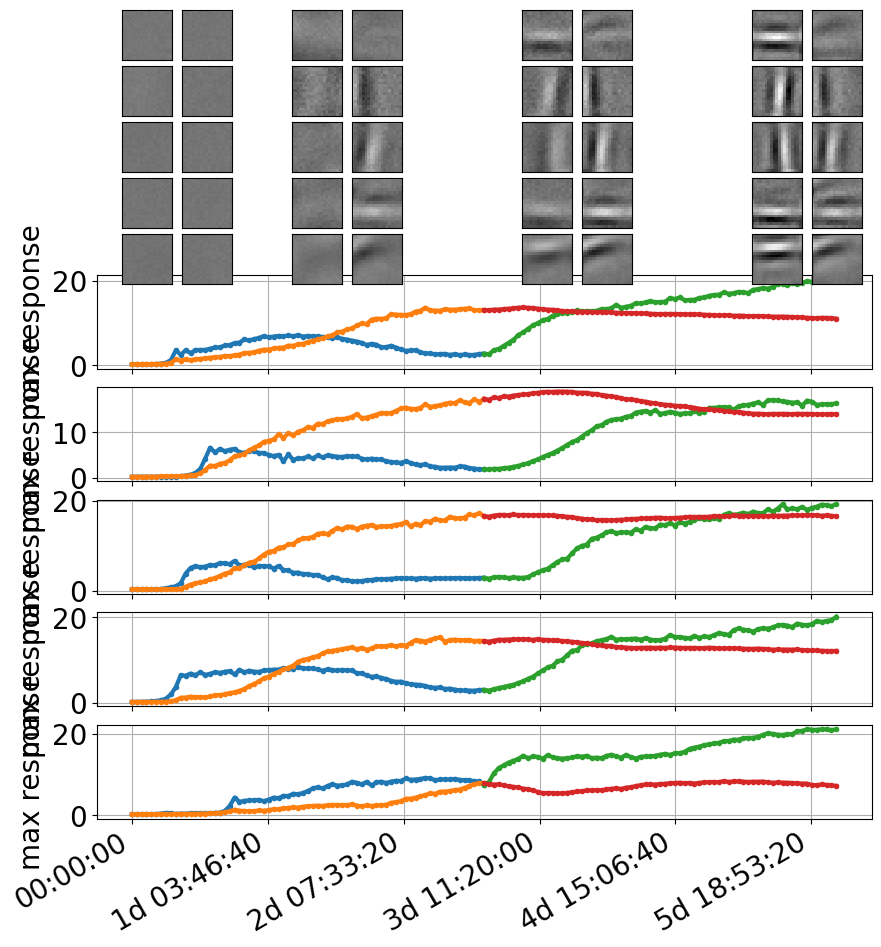

In [20]:
plot_max_response(sfname)
plot_mini_rfs(sfname,
              total_time/10,.15,.85,
              2*total_time/3,.32,.85,
              2*2*total_time/3,.55,.85,
              2*3*total_time/3,.78,.85,
             )

seems to get robust recovery and not much drop in the atropined eye

what about just normal fix?

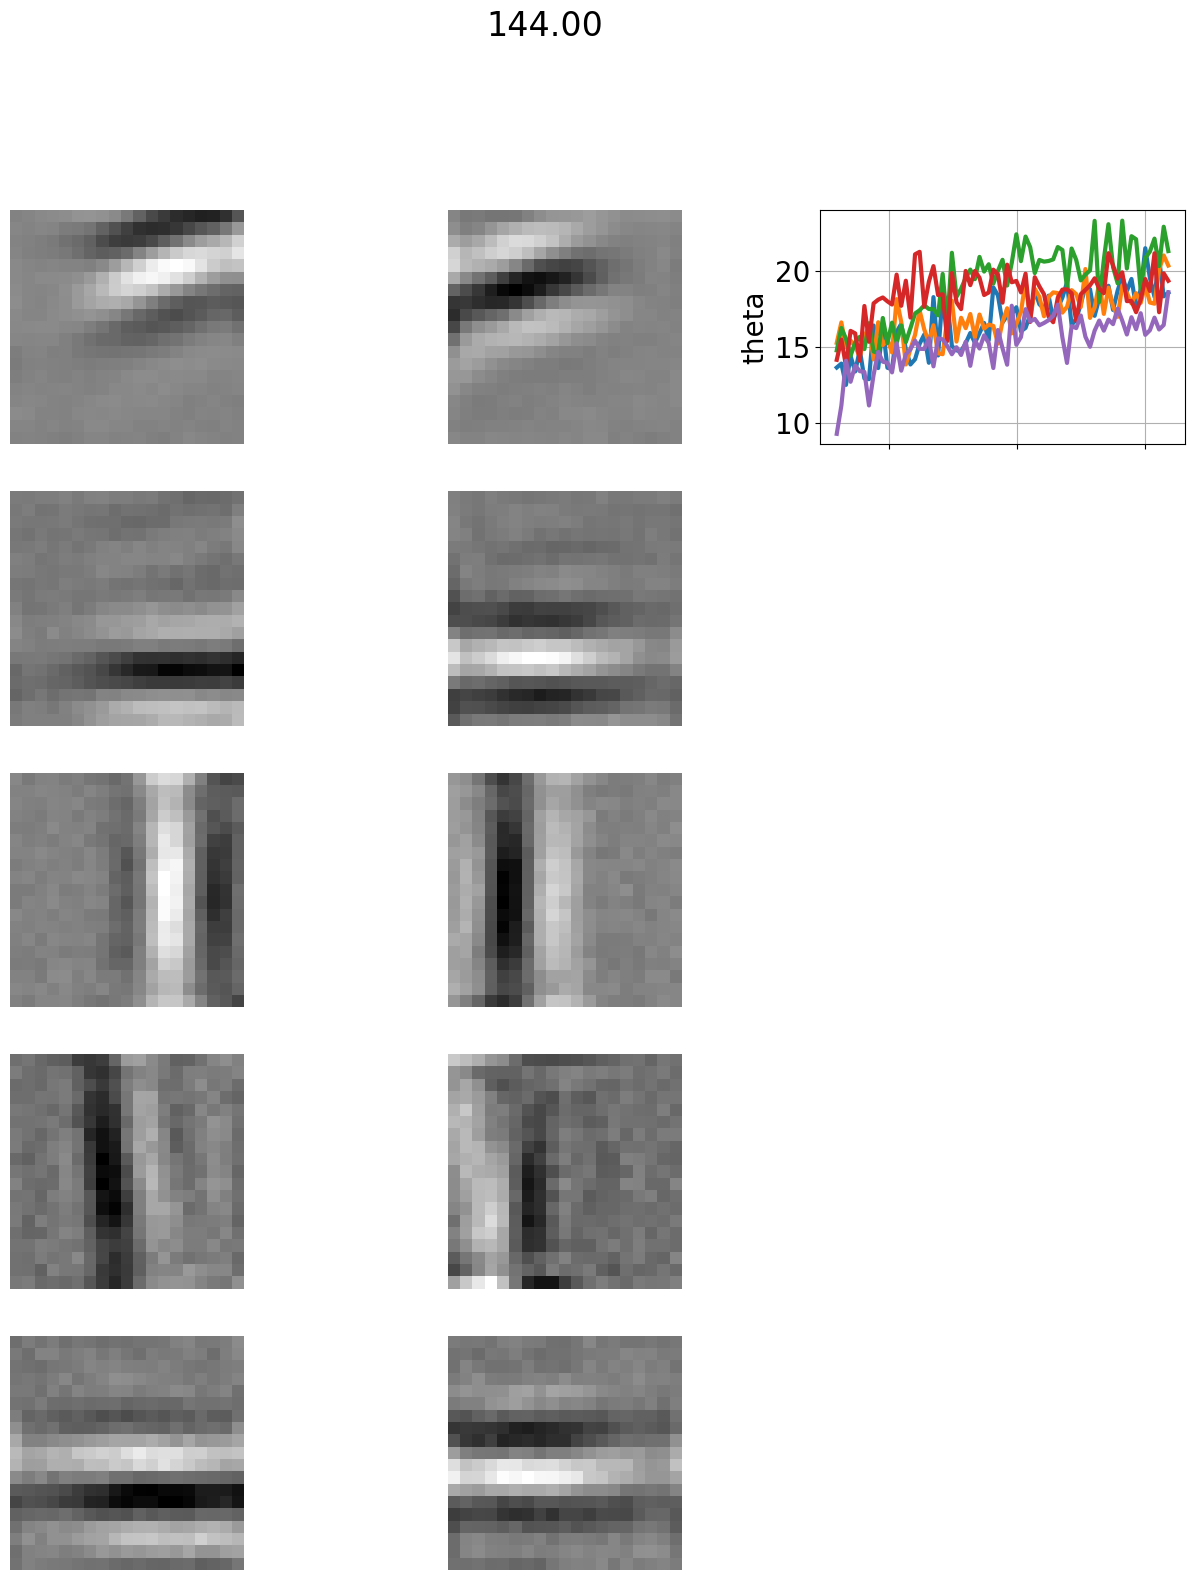

.] Sequence Time Elapsed...1 m, 11.30 s


In [21]:
seq2=pn.Sequence()

total_time=3*day
save_interval=1*hour

seq2.load_seq(seq)

blur_left=-1
blur_right=-1

addseq(seq2)
seq2.run(display=mydisplay,display_hash=False,
               time_between_display=save_interval)
sfname=f"{base}/blah.asdf"
pn.save(sfname,seq2) 

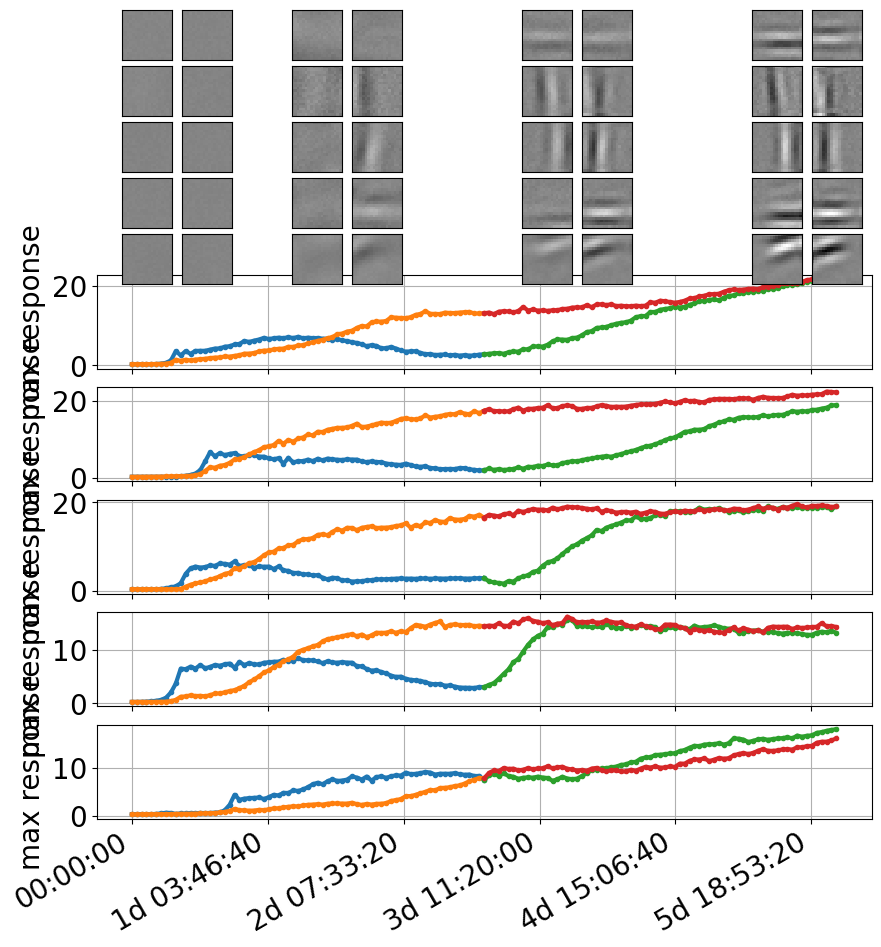

In [22]:
plot_max_response(sfname)
plot_mini_rfs(sfname,
              total_time/10,.15,.85,
              2*total_time/3,.32,.85,
              2*2*total_time/3,.55,.85,
              2*3*total_time/3,.78,.85,
             )